# Check global demographics trends and compare numbers dem4cli and WCDE v2

In [1]:
# necessary: netcdf4-python, regionmask, (xarray, geopandas), cartopy, openpyxl, statsmodels

import numpy as np
import pandas as pd
import matplotlib
import xarray as xr
import netCDF4
%matplotlib inline

# import fxns 
from functions_ana import *
from utils_ana import *
from plotscript import *

# import other packages/modules 
sys.path.append(os.path.join(os.environ['VSC_DATA_VO_USER'],'demographics4climate/')) #hpc
from population_demographics import * 

# 1) Raw and interpolated WCDE data

In [2]:
df_cohort_sizes_ssp2, ages, years = load_cohort_sizes(ssp=2)
da_cohort_sizes = interpolate_cohortsize_countries(df_cohort_sizes_ssp2,
                                                 ages,
                                                 years)

interpolating cohort sizes per country
after interpolation and mean-preserving correction there are some neg numbers in 10, Azerbaijan, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 102, Libyan Arab Jamahiriya, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 136, Papua New Guinea, setting them to zero


In [31]:
d_world = df_cohort_sizes_ssp2.loc['World']
d_world

2_1950      338387.2
2_1955      405612.1
2_1960      432642.8
2_1965      480601.0
2_1970      523700.8
              ...   
102_2080     22134.8
102_2085     28115.2
102_2090     36321.0
102_2095     42244.2
102_2100     48218.6
Name: World, Length: 651, dtype: float64

In [32]:
df_world = pd.DataFrame(np.reshape(d_world,((len(ages),len(years)))),  index=ages, columns=years ).T

In [54]:
#df_world

In [55]:
yearly_index = pd.RangeIndex(start=df_world.index.min(), stop=df_world.index.max() + 1, step=1)
df_yearly = df_world.reindex(yearly_index).interpolate(method='linear')
#df_yearly

In [37]:
df_yearly.loc[2023]

2      654448.84
7      659453.36
12     655064.64
17     627009.46
22     599183.74
27     589279.56
32     597515.60
37     579692.60
42     521862.48
47     482705.52
52     458301.06
57     413987.28
62     350281.70
67     285509.14
72     217459.92
77     142124.10
82      87253.82
87      47451.36
92      18954.80
97       4974.38
102       771.32
Name: 2023, dtype: float64

In [49]:
df_yearly.loc[2023].sum() * 1000 # total n people

7993284680.000002

In [53]:
df_yearly.loc[2023].loc[2:7].sum() * 1000 # n people aged 0-9 = 1.3 billion 

1313902200.0000002

In [50]:
df_yearly.loc[2023].loc[62:67].sum() * 1000 # n people aged 60-69 = 635 million (in v2) 

635790840.0000001

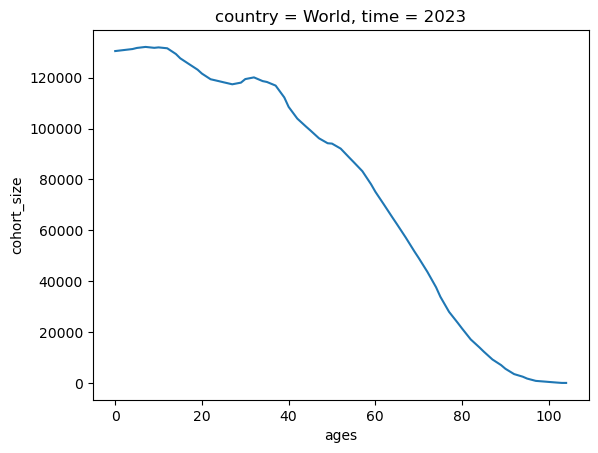

In [3]:
# interpolated WCDE data for both ages and years

da_cohort_sizes.sel(time=2023, country='World').plot

In [13]:
da_cohort_sizes.sel(time=2023, country='World',ages=slice(0,9))

<xarray.DataArray 'cohort_size' (ages: 10)>
array([130489.4064    , 130689.5872    , 130889.768     , 131089.9488    ,
       131290.1296    , 131716.60179739, 131917.31345494, 132118.02511249,
       131939.81491589, 131761.60471929])
Coordinates:
    country  <U5 'World'
    time     int64 2023
  * ages     (ages) int64 0 1 2 3 4 5 6 7 8 9

In [9]:
da_cohort_sizes.sel(time=2023, country='World').sum(dim='ages').values * 1000

7993284680.000001

In [16]:
da_cohort_sizes.sel(time=2023, country='World',ages=slice(0,9)).sum().values * 1000

1313902200.0

In [15]:
da_cohort_sizes.sel(time=2023, country='World',ages=slice(60,69)).sum().values * 1000

635790840.0000001

# 2) After dem4cli processing

In [56]:
gs_population_global_2023 = population_demographics_gridscale_global(startyear=2023,
                                                                endyear=2023,
                                                                ssp=2,
                                                                urbanrural=False)

loading country masks
interpolating cohort sizes per country
calculating gridscale demographics


In [58]:
gs_population_global_2023.sum().values # 8 billion, more than wcde total

array(8.00851946e+09)

In [61]:
gs_population_global_2023.sel(ages=slice(0,9)).sum() # 1.31 billion 

<xarray.DataArray ()>
array(1.31469562e+09)

In [63]:
gs_population_global_2023.sel(ages=slice(60,69)).sum() # 638 milion

<xarray.DataArray ()>
array(6.38118504e+08)